# DC vs Marvel Plot Comparison & Text Preprocessing

In this project we will be looking at the summaries of movies and TV shows in the Marvel and DC universes. We will get a general idea of what they look like, and then we will preprocess the text to prepare it for use in future models. We will go through the individual steps and end up with preprocessed text that is ready to go into a model. The question we are exploring is, what are the differences between the descriptions of Marvel and DC? How would we prepare the text if we wanted to predict which universe it belonged to based solely on the description?

When it comes to Natural Language Processing, of course the model itself is important. But another important consideration is preprocessing text before putting it into a model. If we want our model to perform at its best, we don't want it to worry about unecessary things like capitalization, punctuation, and the like. The words 'This' and 'this' are equivalent to us, but a model will see them as different words and make decisions based on a distinction we don't want. That's why it's important to simplify the text so it only considers the things we want it to, and ignores the things that are not important.

We will also be taking a look at our data to see what changes we may need to make to prepare it for modelling. The idea is to both prepare this particular dataset, and also determine how we might apply text preprocessing to larger and more complicated datasets. This dataset is easy to work with because it's small, the text is relatively short, and it involves professionally written text that is unlikely to have many errors or complications.

This dataset can be found here: https://www.kaggle.com/datasets/suvroo/marvel-vs-dc-movie-and-tv-show-dataset/data

We'll start by importing the libraries we're going to use, loading the data, and putting it into a dataframe. Then we'll learn a few things about the dataset and look at the first five rows to get an idea of what it looks like.

In [1]:
# import libraries and load data
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print(path)

/kaggle/input/marvel-vs-dc-movie-and-tv-show-dataset/Marvel Vs DC.csv


In [2]:
# load data into dataframe
df = pd.read_csv(path)

# view size and column names
print(df.shape)
print(df.columns)

(1690, 14)
Index(['ID', 'Movie', 'Year', 'Genre', 'RunTime', 'Rating', 'Director',
       'Actor', 'Description', 'IMDB_Score', 'Metascore', 'Votes', 'USA_Gross',
       'Category'],
      dtype='object')


This dataset has 1,690 rows and 14 columns.

In [3]:
# view information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1407 non-null   object 
 5   Rating       1463 non-null   object 
 6   Director     1474 non-null   object 
 7   Actor        1660 non-null   object 
 8   Description  1690 non-null   object 
 9   IMDB_Score   1486 non-null   float64
 10  Metascore    65 non-null     float64
 11  Votes        1486 non-null   object 
 12  USA_Gross    64 non-null     object 
 13  Category     1690 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 185.0+ KB


The data has some number of missing values in a number of columns, however, we will only be looking at Description and Category, both of which have no missing values. Both are of datatype object, with Category being either DC or Marvel, and Description being a written summary.

In [4]:
# view the first 5 rows
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
0,0,Eternals,-2021,"Action,Adventure,Drama",NaN,NaN,ChloéZhao,"AngelinaJolie,GemmaChan,RichardMadden,BarryKeo...","The saga of the Eternals, a race of immortal b...",NaN,NaN,NaN,NaN,Marvel
1,1,Loki,(2021– ),"Action,Adventure,Fantasy",NaN,NaN,NaN,"TomHiddleston,OwenWilson,SophiaDiMartino,Richa...",A new Marvel chapter with Loki at its center.,NaN,NaN,NaN,NaN,Marvel
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,TV-14,NaN,"AnthonyMackie,SebastianStan,WyattRussell,ErinK...","Following the events of 'Avengers: Endgame,' S...",7.5,NaN,"105,557",NaN,Marvel
3,3,WandaVision,-2021,"Action,Comedy,Drama",350 min,TV-PG,NaN,"ElizabethOlsen,PaulBettany,KathrynHahn,Teyonah...",Blends the style of classic sitcoms with the M...,8.1,NaN,"174,710",NaN,Marvel
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",NaN,NaN,JonWatts,"AngourieRice,TomHolland,Zendaya,MarisaTomei",A continuation of Spider-Man: Far From Home.,NaN,NaN,NaN,NaN,Marvel


This gives us a glimpse of what the dataset looks like.

In [5]:
# view additional details
df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
count,1690.000000,1690,1657,1683,1407,1463,1474,1660,1690,1486.000000,65.000000,1486,64,1690
unique,NaN,355,147,90,125,16,431,852,1571,NaN,NaN,1105,64,2
top,NaN,Smallville,(2001–2011),"Animation,Action,Adventure",22 min,TV-PG,DanRiba,"BenMcKenzie,DonalLogue,DavidMazouz,MorenaBaccarin",a Plot,NaN,NaN,22,$858.37M,DC
freq,NaN,175,176,439,272,543,72,72,117,NaN,NaN,17,1,1301
mean,844.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.821467,61.230769,NaN,NaN,NaN
std,488.005294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.918777,14.387244,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,27.000000,NaN,NaN,NaN
25%,422.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.300000,53.000000,NaN,NaN,NaN
50%,844.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,64.000000,NaN,NaN,NaN
75%,1266.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,71.000000,NaN,NaN,NaN


Looking at the description column, we can see that not all of the entries are unique. There are some duplicates in the dataset which we will need to remove.

The columns are al follows:

    ID: A unique identifier for each entry in the dataset.
    Movie: The title of the movie or TV show.
    Year: The year of release for the movie or TV show. In some cases, this may also indicate an ongoing series.
    Genre: The genre(s) of the movie or TV show. This can include multiple genres like Action, Adventure, Drama, etc.
    RunTime: The runtime of the movie or TV show. This is typically measured in minutes. For TV shows, this might represent the average duration of an episode.
    Rating: The age rating assigned to the movie or TV show, such as PG, TV-14, etc., indicating the suitability of content for different audiences.
    Director: The name of the director(s) responsible for the movie or TV show.
    Actor: A list of main actors/actresses featured in the movie or TV show.
    Description: A brief synopsis or summary of the plot or main theme of the movie or TV show.
    IMDB_Score: The rating score assigned by users on IMDb, reflecting the general audience's opinion of the movie or TV show.
    Metascore: A score aggregated from critic reviews, often used as a measure of critical reception.
    Votes: The number of votes the movie or TV show has received on IMDb.
    USA_Gross: The gross earnings (in USD) of the movie in the USA. This is typically relevant for theatrical releases.
    Category: A categorical feature indicating whether the movie or TV show belongs to the Marvel or DC universe.

There are many columns here, but again, we will only be looking at Description and Category in this project.

Also, there almost 1,700 films and shows listed in this set. DC and Marvel are popular franchises that have released a large number of features, but not that many. Most likely there are duplicates in some way. We need to figure out what to remove. Let's investigate with an example of movies with the same name.

In [6]:
# view example of some movies with the same name

df[df['Movie']=='Superman']

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
418,418,Superman,-1978,"Action,Adventure,Drama",143 min,PG,RichardDonner,"ChristopherReeve,MargotKidder,GeneHackman,Marl...",An alien orphan is sent from his dying planet ...,7.3,80.0,"161,927",$134.22M,DC
492,492,Superman,-1988,"Animation,Short,Action",30 min,NaN,NaN,"BeauWeaver,GinnyMcSwain,MarkL.Taylor,TressMacN...",The Man of Steel fights evil in the city of Me...,7.1,NaN,778,NaN,DC
574,574,Superman,(I) (1987 Video Game),"Action,Adventure,Sci-Fi",NaN,NaN,NaN,or:ToshiyukiNishimura,Aliens invade planet Earth and only Superman c...,6.3,NaN,38,NaN,DC


Here is an example of how there might be multiple films and shows with the same name. Multiple fims are titled 'Superman', but if we look at the other details such as year, we can see that they are not the same film. So we will remove duplicates from this dataset, but we will determine uniqueness based on both title and year, so as not to remove distinct films with the same name.

In [7]:
# drop duplicates, in case there are duplicates of movies of the same year but just with different descriptions
df = df.drop_duplicates(subset=['Movie', 'Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 1659
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           378 non-null    int64  
 1   Movie        378 non-null    object 
 2   Year         355 non-null    object 
 3   Genre        371 non-null    object 
 4   RunTime      281 non-null    object 
 5   Rating       222 non-null    object 
 6   Director     235 non-null    object 
 7   Actor        354 non-null    object 
 8   Description  378 non-null    object 
 9   IMDB_Score   305 non-null    float64
 10  Metascore    65 non-null     float64
 11  Votes        305 non-null    object 
 12  USA_Gross    64 non-null     object 
 13  Category     378 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 44.3+ KB


For our analysis we wish to see unique descriptions, meaning that every description should only occur once. Let's look at a frequency table to see if that's the case here.

In [8]:
df['Description'].value_counts()

Description
a Plot                                                                                                                                                                                                                                         43
The plot is unknown.                                                                                                                                                                                                                            2
A team of the greatest DC Comics superheroes protects Earth with the help of a pair of alien sibling apprentices.                                                                                                                               1
Now with the addition of Firestorm, the Super Friends oppose the forces of evil, especially the evil New God, Darkseid.                                                                                                                         1
Scientist Alec Holla

We have a couple invalid descriptions here, 'a Plot' and 'The plot is unknown.'
These are not meaningful in our analysis and will be removed.

In [9]:
# remove entries with invalid plots
df = df.drop(df[(df['Description'] == 'a Plot') | (df['Description'] == 'The plot is unknown.')].index)
df['Description'].value_counts()

Description
The saga of the Eternals, a race of immortal beings who lived on Earth and shaped its history and civilizations.                                                                                                                     1
Documentary about the Dark Knight Trilogy.                                                                                                                                                                                           1
Picking up where the original series left off, Scott Bernard continues his search for Rick Hunter and the fate of the SDF-3.                                                                                                         1
A team of the greatest DC Comics superheroes protects Earth with the help of a pair of alien sibling apprentices.                                                                                                                    1
Now with the addition of Firestorm, the Super Friends oppose the

After these steps, we have removed duplicates of films as well as anything with an invalid description. We are now ready to move on to the next phase.

### Explore Data

Next we will drop everything we're not using for our analysis. Since we're looking at the plot descriptions and whether they belong to DC or Marvel, we will only need the Description and Category columns. Then we will visualize how many of the entries in our dataset are DC and how many are Marvel.

In [10]:
# drop unnecessary columns
df = df.drop(['ID', 'Movie', 'Year', 'Genre', 'RunTime', 'Rating', 'Director',
       'Actor', 'IMDB_Score', 'Metascore', 'Votes', 'USA_Gross'], axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  333 non-null    object
 1   Category     333 non-null    object
dtypes: object(2)
memory usage: 7.8+ KB


In [11]:
# view the first 5 entries of our pared down dataset
df.head()

,Description,Category
0,"The saga of the Eternals, a race of immortal b...",Marvel
1,A new Marvel chapter with Loki at its center.,Marvel
2,"Following the events of 'Avengers: Endgame,' S...",Marvel
3,Blends the style of classic sitcoms with the M...,Marvel
4,A continuation of Spider-Man: Far From Home.,Marvel


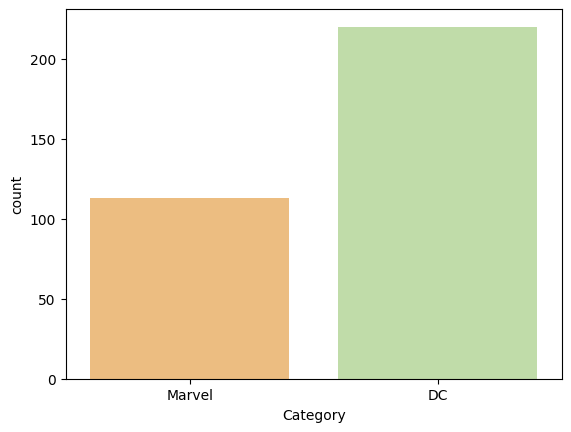

In [12]:
# create countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Category', data=df, palette='Spectral')

# show the plot
plt.show()

In [13]:
# view counts of target variable
df['Category'].value_counts()

Category
DC        220
Marvel    113
Name: count, dtype: int64

There are about twice as many entries for DC in this dataset as there are for Marvel.

Another consideration might be, how long are the plot summaries for DC vs Marvel?

In [14]:
# make a new column listing the lengths of the descriptions
df['Description_lengths'] = df['Description'].str.len()
df['Description_lengths'].head()

0    112
1     45
2    174
3    200
4     44
Name: Description_lengths, dtype: int64

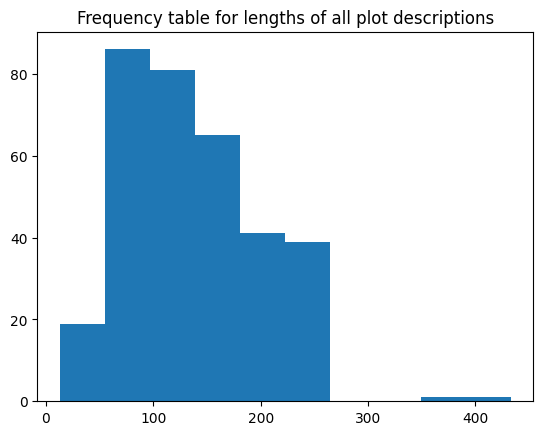

In [15]:
plt.hist(x=df['Description_lengths'])
plt.title('Frequency table for lengths of all plot descriptions')
plt.show()

Above we can see the frequencies of description lengths for DC and Marvel combined. Most lengths are between 50 and 200 characters, with a very small number at around 400. Next we'll look at DC and Marvel description length frequencies separately.

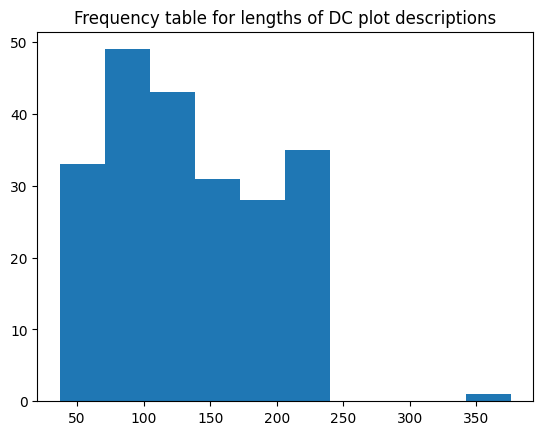

In [16]:
# histogram for DC movies and show description length
dc = df[df['Category']=='DC']
plt.hist(x=dc['Description_lengths'])
plt.title('Frequency table for lengths of DC plot descriptions')
plt.show()

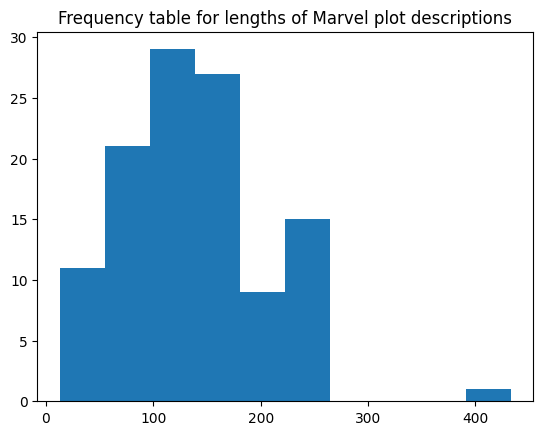

In [17]:
# histogram for Marvel movies and show description length
marvel = df[df['Category']=='Marvel']
plt.hist(x=marvel['Description_lengths'])
plt.title('Frequency table for lengths of Marvel plot descriptions')
plt.show()

For DC plot lengths, anything between 50 and 250 occur with similar frequency, but the most common length is around 100. For Marvel plot lengths, they are more likely to be around 150 characters.

Let's take a look at the outliers that have far more characters.

In [18]:
df[df['Description_lengths']>350]

,Description,Category,Description_lengths
94,"In a world of award shows that suck, MTV gives...",Marvel,433
441,Five interwoven stories that occur on Hallowee...,DC,376


Although they are outliers in terms of length, the above descriptions appear valid, so we will keep these entries. Now we will take a look at the shortest summaries.

In [19]:
# show entries with short summaries
df[df['Description_lengths']<40]

,Description,Category,Description_lengths
48,Plot is unknown at this time.,Marvel,29
83,Plot Unknown.,Marvel,13
85,Plot under wraps.,Marvel,17
91,Plot kept under wraps.,Marvel,22
566,Lynda Carter's fifth variety special.,DC,37


The above shows that descriptions with lengths shorter than 30 refer to the plots being unknown. These are not part of our analysis, and we will remove them.

In [20]:
# remove entries with invalid descriptions
df = df[df['Description_lengths']>30]

# view remaining shortest summaries
df[df['Description_lengths']<40]

,Description,Category,Description_lengths
566,Lynda Carter's fifth variety special.,DC,37


Now we have pared down the dataset to only include information we wish to use in our analysis, and we're ready to move on to text preprocessing.

### Text Preprocessing

We need to take our summaries from unstructured text into something suitable for our model. This involves a number of steps:
- lowercase text
- remove punctuation
- tokenize text
- remove stopwords
- convert text back to sentences

We will go through the steps individually to see how they work and how each one changes the text.

In [21]:
# import text preprocessing tools
import re
import nltk

We will lowercase all letters and remove punctuation so that our model won't be distracted by these unwanted details.

In [22]:
# lowercase the text
df['Description'] = df['Description'].str.lower()

# create a function that removes punctuation and numbers from the text
def remove_punctuation(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

df['Description'] = df['Description'].apply(remove_punctuation)
df['Description'].head()

0    the saga of the eternals  a race of immortal b...
1        a new marvel chapter with loki at its center 
2    following the events of  avengers  endgame   s...
3    blends the style of classic sitcoms with the m...
4         a continuation of spider man  far from home 
Name: Description, dtype: object

Tokenization is where we break up the descriptions into individual words, or tokens. This makes it easier to perform tasks, such as removing unwanted words, which we will get to next.

In [23]:
from nltk.tokenize import word_tokenize

# define a function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

df['Description_tokenized'] = df['Description'].apply(tokenize_text)
df['Description_tokenized'].head()

0    [the, saga, of, the, eternals, a, race, of, im...
1    [a, new, marvel, chapter, with, loki, at, its,...
2    [following, the, events, of, avengers, endgame...
3    [blends, the, style, of, classic, sitcoms, wit...
4    [a, continuation, of, spider, man, far, from, ...
Name: Description_tokenized, dtype: object

We will streamline our summaries even more by removing 'stopwords'. This means getting rid of words like 'I' and 'it' which are common but do not add much meaning to a sentence. By removing these our model can better concentrate on differences in the text.

In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# define a function to remove stopwords from the tokenized text
def remove_stopwords(tokenized_text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    return [word for word in tokenized_text if word not in stop_words]

df['Description_stopworded'] = df['Description_tokenized'].apply(remove_stopwords)
df['Description_stopworded'].head()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


0    [saga, eternals, race, immortal, beings, lived...
1                 [new, marvel, chapter, loki, center]
2    [following, events, avengers, endgame, sam, wi...
3    [blends, style, classic, sitcoms, mcu, wanda, ...
4               [continuation, spider, man, far, home]
Name: Description_stopworded, dtype: object

Finally we return the text to sentence format by joining the strings.

In [25]:
# create a new column that joins the text
df['Description_final'] = df['Description_stopworded'].str.join(' ')
df['Description_final'].head()

0    saga eternals race immortal beings lived earth...
1                       new marvel chapter loki center
2    following events avengers endgame sam wilson f...
3    blends style classic sitcoms mcu wanda maximof...
4                     continuation spider man far home
Name: Description_final, dtype: object

### Word Cloud

Creating a word cloud will help us to visualize what Marvel and DC summaries look like, and how their general themes differ. Word clouds show the words that are most commonly used, and the more common the word is, the larger it is in the visualization.

To simplify things, we will assign the category of 'DC' as 0 and 'Marvel' as 1

In [26]:
df['Category'].value_counts()

Category
DC        220
Marvel    109
Name: count, dtype: int64

In [27]:
# dictionary for mapping values
cat_map = {'DC': 0,
          'Marvel': 1}
# map values
df['Category'] = df['Category'].map(cat_map)
# view changes
df['Category'].value_counts()

Category
0    220
1    109
Name: count, dtype: int64

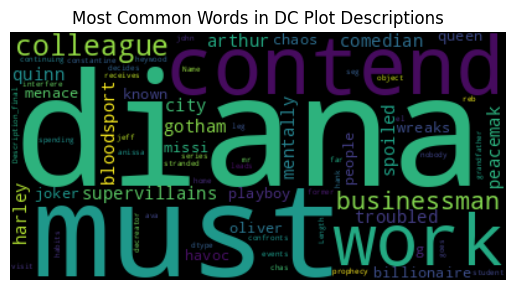

In [28]:
# import WordCloud
from wordcloud import WordCloud

# create dataframe containing only DC entries
df_dc = df[df['Category']==0]

# create and plot a wordcloud
wordcloud = WordCloud(max_words=100, random_state=13, background_color='black', collocations=False)

wordcloud.generate(str((df_dc['Description_final'])))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in DC Plot Descriptions')
plt.show()

DC descriptions tend to use words that convey obligation, such as must, contend, and work, and also words that are directly stating what's in the story, such as businessman, colleague, and supervillains. We may also recognize some character names, such as diana and harley.

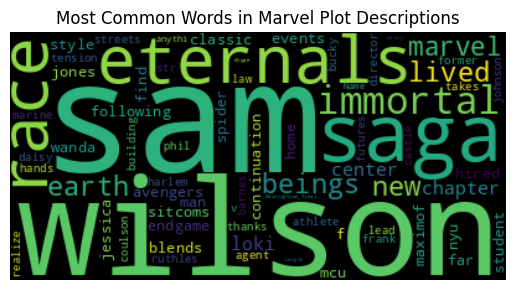

In [29]:
# create dataframe containing only Marvel entries
df_marvel = df[df['Category']==1]

# create and plot a wordcloud
wordcloud = WordCloud(max_words=100, random_state=13, background_color='black', collocations=False)

wordcloud.generate(str((df_marvel['Description_final'])))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Marvel Plot Descriptions')
plt.show()

Marvel descriptions tend to have more epic words, like saga, eternals, and immortal, as well as words that reference a story or series such as chapter and continuation. The Marvel descriptions also commonly list names, such as sam, wilson, and marvel itself.



In both cases, the most common words tend to be the names of characters. This is unsurprising, since of course film descriptions will say who the starring characters are. But to really see how the descriptions of DC and Marvel films and shows differ, we want to avoid looking at names so we can focus on word choice. Next we will remove some of the characters from the descriptions and look at the common words again.

For simplicaity, in this instance we will remove just a few names. In practical usage, we would want to take a comprehensive list of character names and remove all of them so that the model will have no 'hints' based on names mentioned.

In [30]:
# create function that removes listed names from text
def remove_names(text):
    names = ['quinn', 'joker', 'diana', 'harley', 'gotham', 'peacemaker', 'oliver', 'arthur', 'queen', 'sam', 'wilson', 'loki', 'marvel', 'avengers', 'barnes', 'bucky']
    text = word_tokenize(text)
    text = [word for word in text if word not in names]
    return ' '.join(text)

# apply function and remove names from column
df['Description_unnamed'] = df['Description_final'].apply(remove_names)
df['Description_unnamed'].head()

0    saga eternals race immortal beings lived earth...
1                                   new chapter center
2    following events endgame falcon winter soldier...
3    blends style classic sitcoms mcu wanda maximof...
4                     continuation spider man far home
Name: Description_unnamed, dtype: object

Now that these names have been removed, we will make new word clouds and view the results.

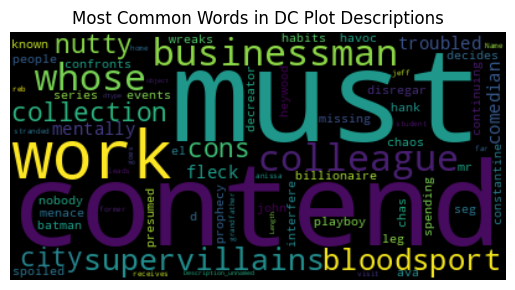

In [31]:
# create dataframe containing only DC entries
df_dc = df[df['Category']==0]

# create and plot a wordcloud
wordcloud = WordCloud(max_words=100, random_state=13, background_color='black', collocations=False)

wordcloud.generate(str((df_dc['Description_unnamed'])))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in DC Plot Descriptions')
plt.show()

DC has memorable supervillains that are often mentally deranged and wreak havoc on cities, which is reflected in their descriptions.

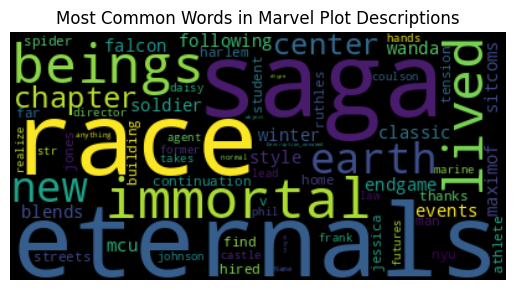

In [32]:
# create dataframe containing only Marvel entries
df_marvel = df[df['Category']==1]

# create and plot a wordcloud
wordcloud = WordCloud(max_words=100, random_state=13, background_color='black', collocations=False)

wordcloud.generate(str((df_marvel['Description_unnamed'])))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Marvel Plot Descriptions')
plt.show()

Marvel has more mutant and inhuman characters, which is reflected in words like beings and race.

Even with the removal of character names, we can see that the general word choices between DC and Marvel are very different.

### Conclusion

We have taken a look at our data, pared it down to what we are interested in, preprocessed the text to prepare it for future models, and visualized the differences between DC and Marvel summaries. We could now take the data to use in a model to predict whether a description belongs to the DC or Marvel universe. Additionally, this method could be used with other datasets, including larger and more complicated ones.